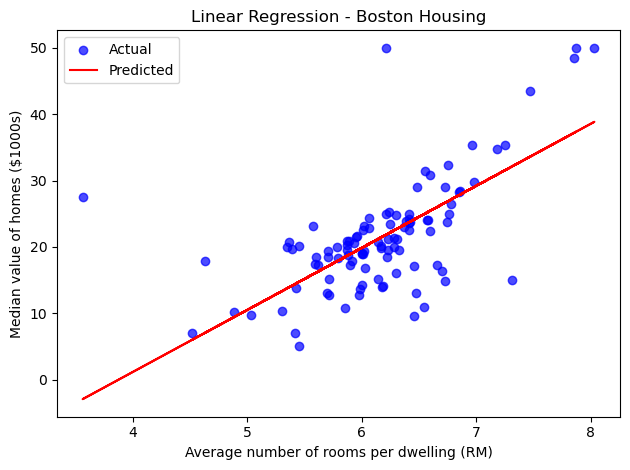

Linear Regression - Boston Housing
Mean Squared Error: 46.14
R² Score: 0.37



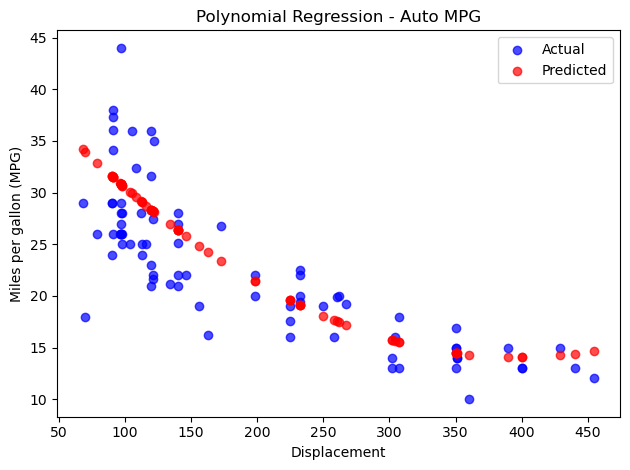

Polynomial Regression - Auto MPG
Mean Squared Error: 20.65
R² Score: 0.60



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_and_plot(X_test, y_test, y_pred, xlabel, ylabel, title, is_poly=False):
    plt.scatter(X_test, y_test, color="blue", label="Actual", alpha=0.7)
    if is_poly:
        plt.scatter(X_test, y_pred, color="red", label="Predicted", alpha=0.7)
    else:
        plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(title)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}\n")

def linear_regression_boston():
    url1="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    df = pd.read_csv(url1)
    X = df[["rm"]]
    y = df["medv"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    evaluate_and_plot(X_test, y_test, model.predict(X_test),
                    "Average number of rooms per dwelling (RM)",
                    "Median value of homes ($1000s)",
                    "Linear Regression - Boston Housing")

def polynomial_regression_auto_mpg():
    url2 = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
    df = pd.read_csv(url2).dropna()
    X = df[["displacement"]]
    y = df["mpg"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression()).fit(X_train, y_train)
    evaluate_and_plot(X_test, y_test, model.predict(X_test),
                    "Displacement", "Miles per gallon (MPG)",
                    "Polynomial Regression - Auto MPG", is_poly=True)

linear_regression_boston()
polynomial_regression_auto_mpg()

Demonstrating Linear Regression and Polynomial Regression



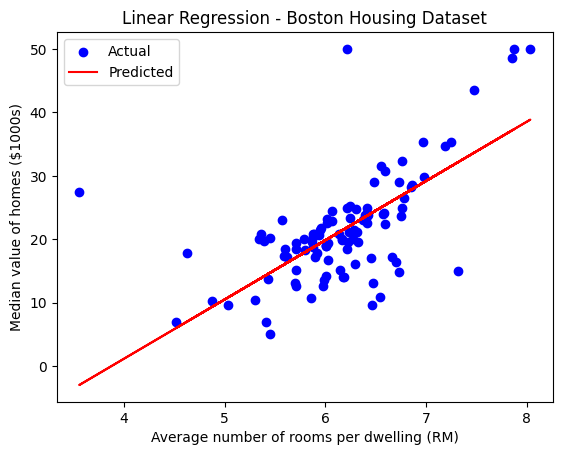

Linear Regression - Boston Housing Dataset
Mean Squared Error: 46.144775347317264
R^2 Score: 0.3707569232254778


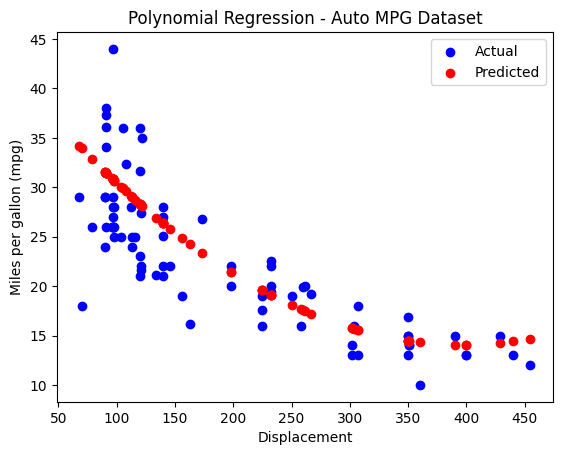

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 20.649054718308797
R^2 Score: 0.5954385038809511


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


def linear_regression_boston():
	# Load Boston Housing dataset from CSV (same structure as old load_boston())
	url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
	df = pd.read_csv(url)

	# Rename columns to match sklearn's original load_boston output (optional but keeps parity)
	df.columns = [col.upper() for col in df.columns]

	X = df[["RM"]]  # Feature: average number of rooms
	y = df["MEDV"]  # Target: Median value of homes ($1000s)

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

	model = LinearRegression()
	model.fit(X_train, y_train)

	y_pred = model.predict(X_test)

	plt.scatter(X_test, y_test, color="blue", label="Actual")
	plt.plot(X_test, y_pred, color="red", label="Predicted")
	plt.xlabel("Average number of rooms per dwelling (RM)")
	plt.ylabel("Median value of homes ($1000s)")
	plt.title("Linear Regression - Boston Housing Dataset")
	plt.legend()
	plt.show()

	print("Linear Regression - Boston Housing Dataset")
	print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
	print("R^2 Score:", r2_score(y_test, y_pred))


def polynomial_regression_auto_mpg():
	url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
	column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight",
                "acceleration", "model_year", "origin", "car_name"]
	data = pd.read_csv(url, sep=r'\s+', names=column_names, na_values="?", comment="\t", skipinitialspace=True)
	data = data.dropna()

	X = data["displacement"].values.reshape(-1, 1)
	y = data["mpg"].values

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

	poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
	poly_model.fit(X_train, y_train)

	y_pred = poly_model.predict(X_test)

	plt.scatter(X_test, y_test, color="blue", label="Actual")
	plt.scatter(X_test, y_pred, color="red", label="Predicted")
	plt.xlabel("Displacement")
	plt.ylabel("Miles per gallon (mpg)")
	plt.title("Polynomial Regression - Auto MPG Dataset")
	plt.legend()
	plt.show()

	print("Polynomial Regression - Auto MPG Dataset")
	print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
	print("R^2 Score:", r2_score(y_test, y_pred))


if __name__ == "__main__":
	print("Demonstrating Linear Regression and Polynomial Regression\n")
	linear_regression_boston()
	polynomial_regression_auto_mpg()
